### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [ ]:
from google.colab import files
files.upload()

Saving day.csv to day.csv


{'day.csv': b'instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt\r\n1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985\r\n2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801\r\n3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349\r\n4,04-01-2018,1,0,1,0,4,1,1,8.2,10.6061,59.0435,10.739832,108,1454,1562\r\n5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.4635,43.6957,12.5223,82,1518,1600\r\n6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.0008684,88,1518,1606\r\n7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510\r\n8,08-01-2018,1,0,1,0,1,1,2,6.765,8.1127,53.5833,17.875868,68,891,959\r\n9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.25065,54,768,822\r\n10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.5444,48.2917,14.958889,41,1280,1321\r\n11,11-01-2018,1,0,1,0,4,1,2,6.932731,9.5732,68.6364,8.182844,43,1220,1263\r\n12,12-01-2018,1,0,1,

In [151]:
import warnings
warnings.filterwarnings('ignore')

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [153]:
bike_share = pd.read_csv('day.csv')
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [154]:
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [155]:
bike_share.weathersit.unique()

array([2, 1, 3])

In [156]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [157]:
bike_share.shape

(730, 16)

In [158]:
# Checking for duplicate columns, if any, and dropping them
bike_share_dup = bike_share.copy()
bike_share_dup.drop_duplicates(subset=None, inplace = True)
bike_share_dup.shape

(730, 16)

In [159]:
# To check all the values of the dataset
col = list(bike_share_dup.columns)
col

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [160]:
for val in col:
  print(bike_share_dup[val].value_counts(ascending=False), '\n\n')

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64 


01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 


3    188
2    184
1    180
4    178
Name: season, dtype: int64 


0    365
1    365
Name: yr, dtype: int64 


1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 


0    709
1     21
Name: holiday, dtype: int64 


1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64 


1    504
0    226
Name: workingday, dtype: int64 


1    463
2    246
3     21
Name: weathersit, dtype: int64 


26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
2

In [161]:
# creating a new dataset with important columns
bike_share_updated = bike_share[[
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']]

bike_share_updated.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985


In [162]:
# Converting catagorical variable

bike_share_updated.season = bike_share_updated.season.astype('category')
bike_share_updated.weathersit = bike_share_updated.weathersit.astype('category')
bike_share_updated.mnth = bike_share_updated.mnth.astype('category')
bike_share_updated.weekday = bike_share_updated.weekday.astype('category')
bike_share_updated.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(6)
memory usage: 61.1 KB


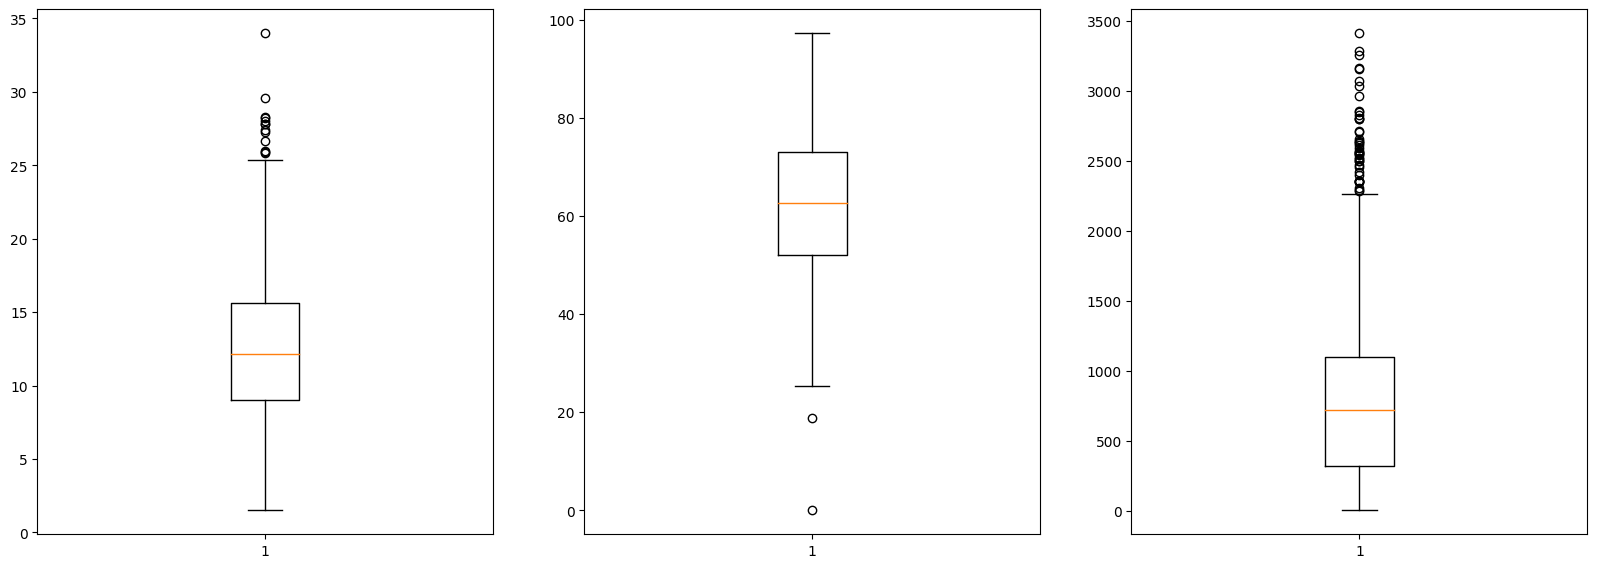

In [163]:
fig = plt.figure(figsize = (20, 15))
plt.subplot(2,3,1)
plt.boxplot(bike_share_updated['windspeed'])
plt.subplot(2,3,2)
plt.boxplot(bike_share_updated['hum'])
plt.subplot(2,3,3)
plt.boxplot(bike_share_updated['casual'])
plt.show()

In [164]:
# Removing outliers from 'casual' variable
def get_upper_lower_bound(data):
  Q1 = bike_share_updated[data].quantile(.25)
  Q3 = bike_share_updated[data].quantile(.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5*IQR)
  upper_bound = Q3 + (1.5*IQR)
  return (lower_bound, upper_bound)

In [165]:
# Handling outliers
l1, u1 = get_upper_lower_bound('windspeed')
print(l1,u1)
l2, u2 = get_upper_lower_bound('hum')
print(l2,u2)
l3, u3 = get_upper_lower_bound('casual')
print(l3,u3)

-0.8342588749999997 25.501498125
20.515637499999997 104.4739375
-854.125 2266.875


In [166]:
# Handling outliers
# Removing outliers from 'windspeed' variable
bike_share_updated['windspeed'] = np.where(bike_share_updated['windspeed'] > u1,u1, np.where(bike_share_updated['windspeed'] < l1,l1, bike_share_updated['windspeed']))
# Removing outliers from 'hum' variable
bike_share_updated['hum'] = np.where(bike_share_updated['hum'] > u2,u2, np.where(bike_share_updated['hum'] < l2,l2, bike_share_updated['hum']))
# Removing outliers from 'casual' variable
bike_share_updated['casual'] = np.where(bike_share_updated['casual'] > u3,u3, np.where(bike_share_updated['casual'] < l3,l3, bike_share_updated['casual']))

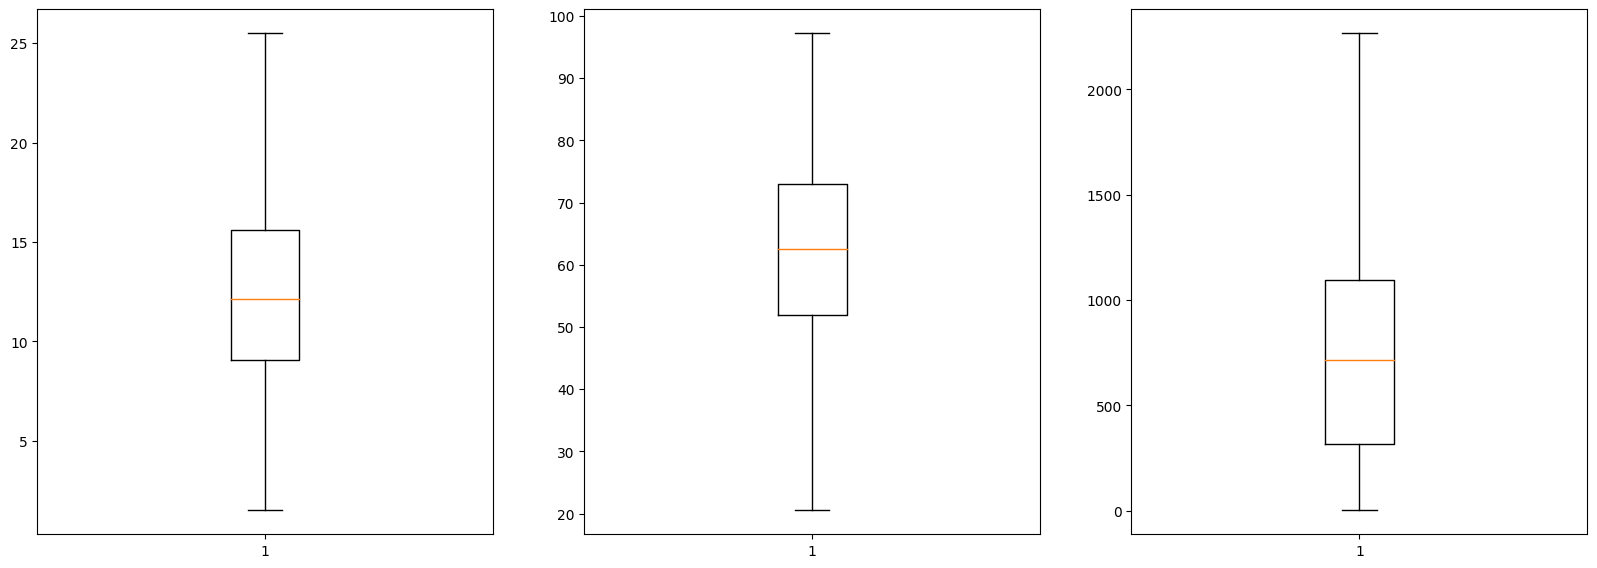

In [167]:
fig = plt.figure(figsize = (20, 15))
plt.subplot(2,3,1)
plt.boxplot(bike_share_updated['windspeed'])
plt.subplot(2,3,2)
plt.boxplot(bike_share_updated['hum'])
plt.subplot(2,3,3)
plt.boxplot(bike_share_updated['casual'])
plt.show()

In [168]:
# creating dummy variables for all catagorical variables
bike_share_updated = pd.get_dummies(bike_share_updated, drop_first=True)
bike_share_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   casual        730 non-null    float64
 8   registered    730 non-null    int64  
 9   cnt           730 non-null    int64  
 10  season_2      730 non-null    uint8  
 11  season_3      730 non-null    uint8  
 12  season_4      730 non-null    uint8  
 13  mnth_2        730 non-null    uint8  
 14  mnth_3        730 non-null    uint8  
 15  mnth_4        730 non-null    uint8  
 16  mnth_5        730 non-null    uint8  
 17  mnth_6        730 non-null    uint8  
 18  mnth_7        730 non-null    

In [169]:
bike_share_updated.head(1)

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331.0,654,985,...,0,0,1,0,0,0,0,0,1,0


In [170]:
bike_share_updated.shape

(730, 32)

In [171]:
# Spliting the data into train and test set
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike_share_updated, test_size = 0.3, random_state = 100)

In [172]:
print(df_train.shape)
print(df_test.shape)

(511, 32)
(219, 32)


In [173]:
# Exploratory data analysis and visualizaiton

df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_2', 'season_3', 'season_4',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

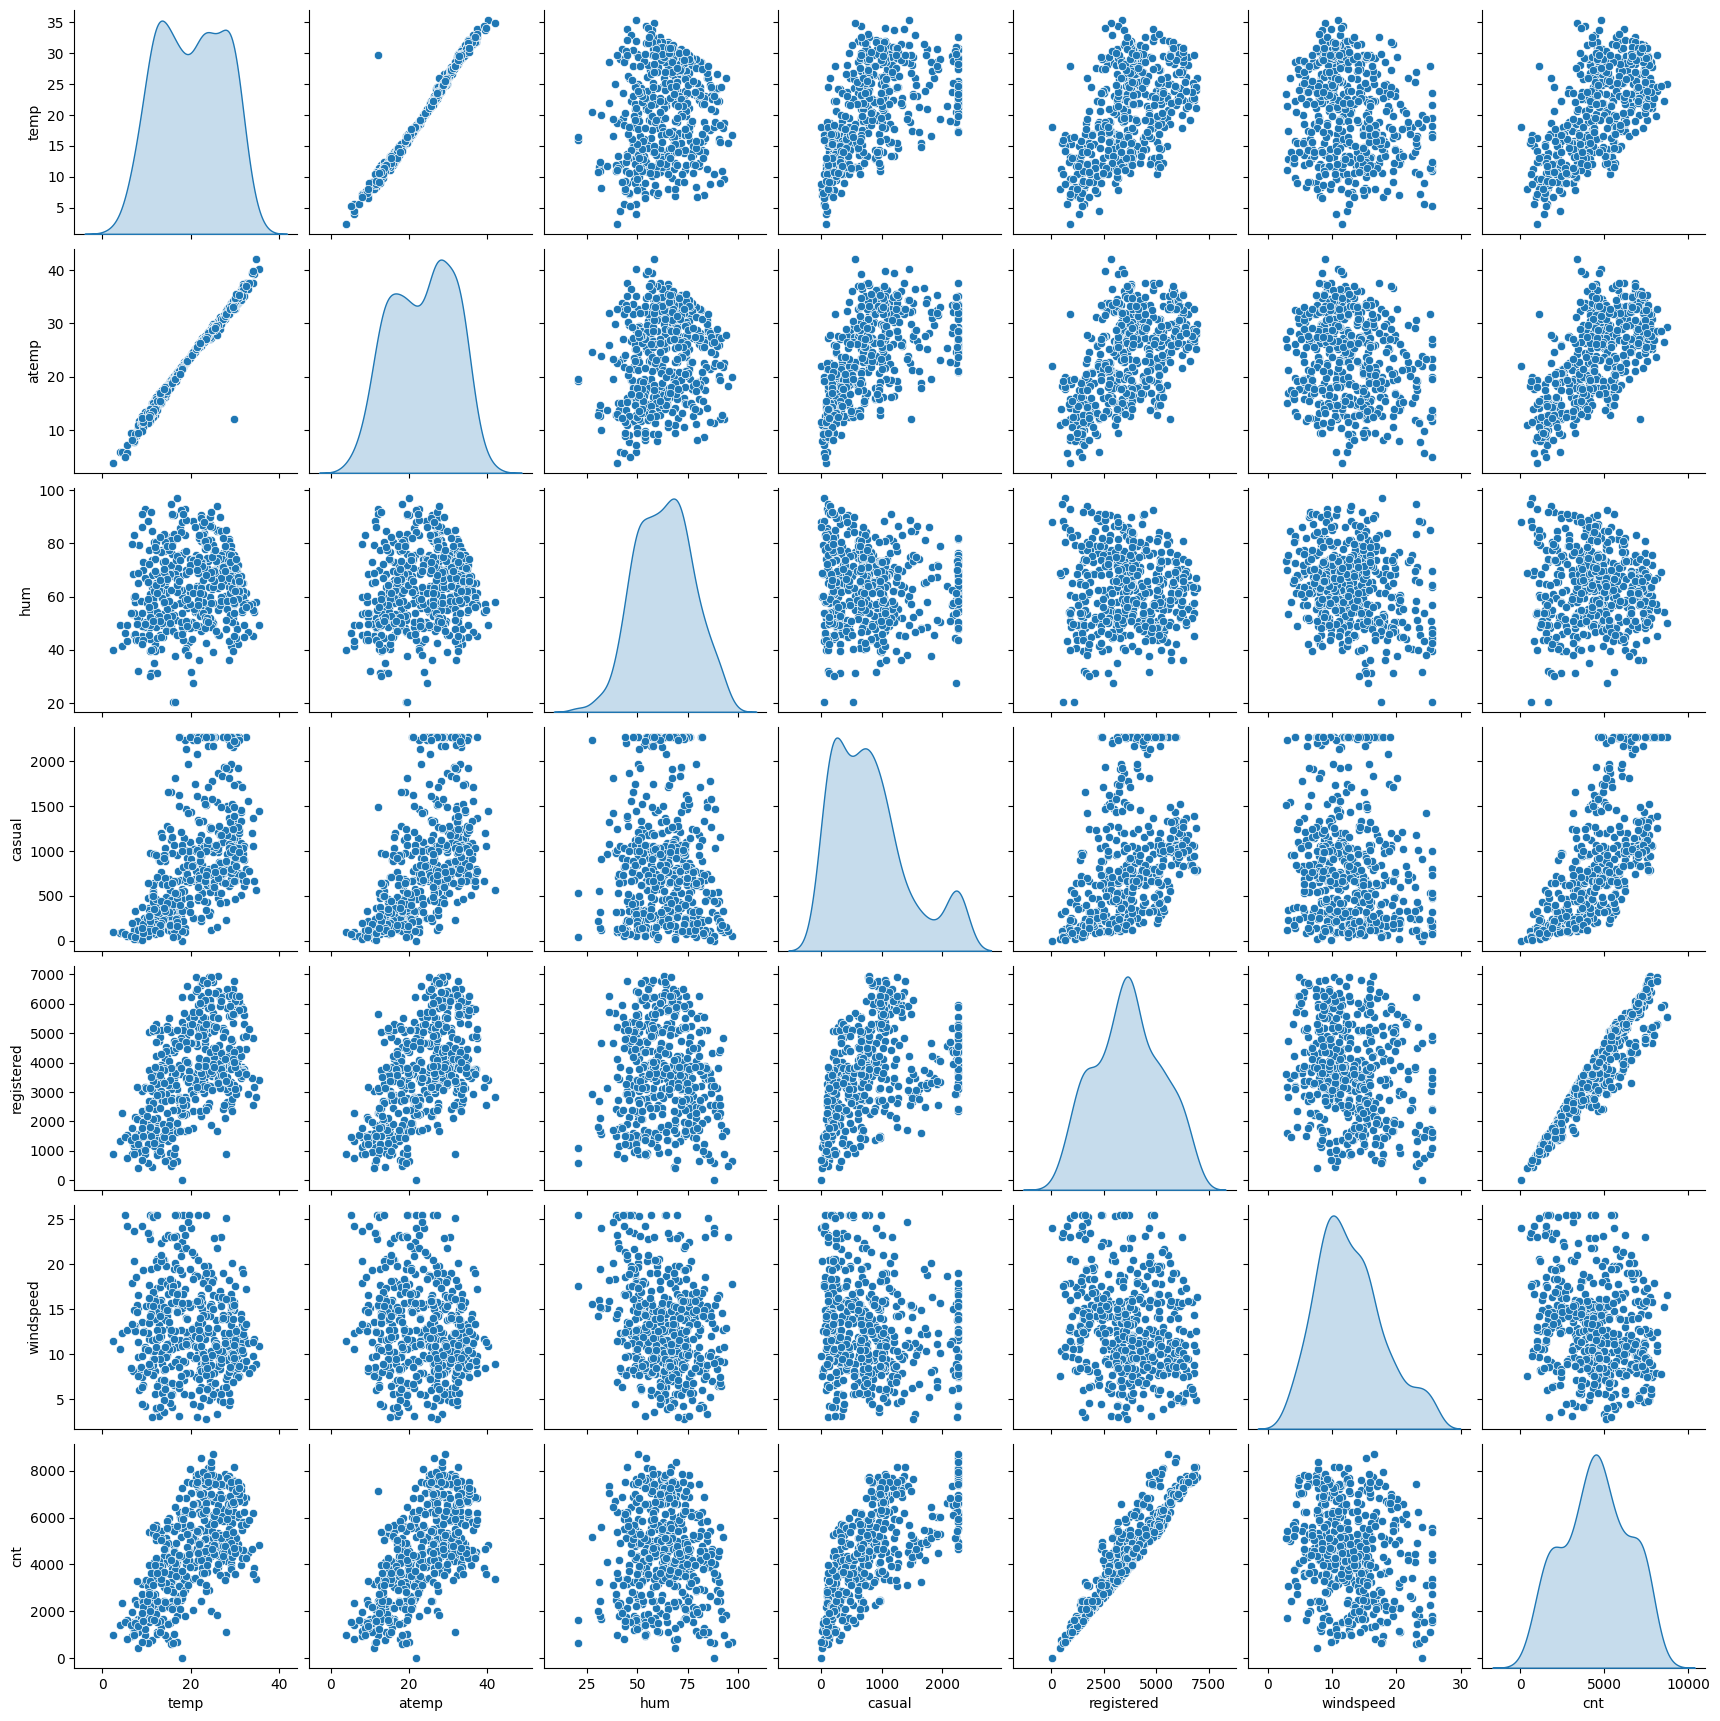

In [174]:
# Visulaizing all numeric columns
df_train_num = df_train[['temp', 'atemp', 'hum', 'casual', 'registered', 'windspeed', 'cnt']]
sns.pairplot(df_train_num, diag_kind='kde')

In [175]:
bike_share_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   casual        730 non-null    float64
 8   registered    730 non-null    int64  
 9   cnt           730 non-null    int64  
 10  season_2      730 non-null    uint8  
 11  season_3      730 non-null    uint8  
 12  season_4      730 non-null    uint8  
 13  mnth_2        730 non-null    uint8  
 14  mnth_3        730 non-null    uint8  
 15  mnth_4        730 non-null    uint8  
 16  mnth_5        730 non-null    uint8  
 17  mnth_6        730 non-null    uint8  
 18  mnth_7        730 non-null    

<Axes: xlabel='workingday', ylabel='cnt'>

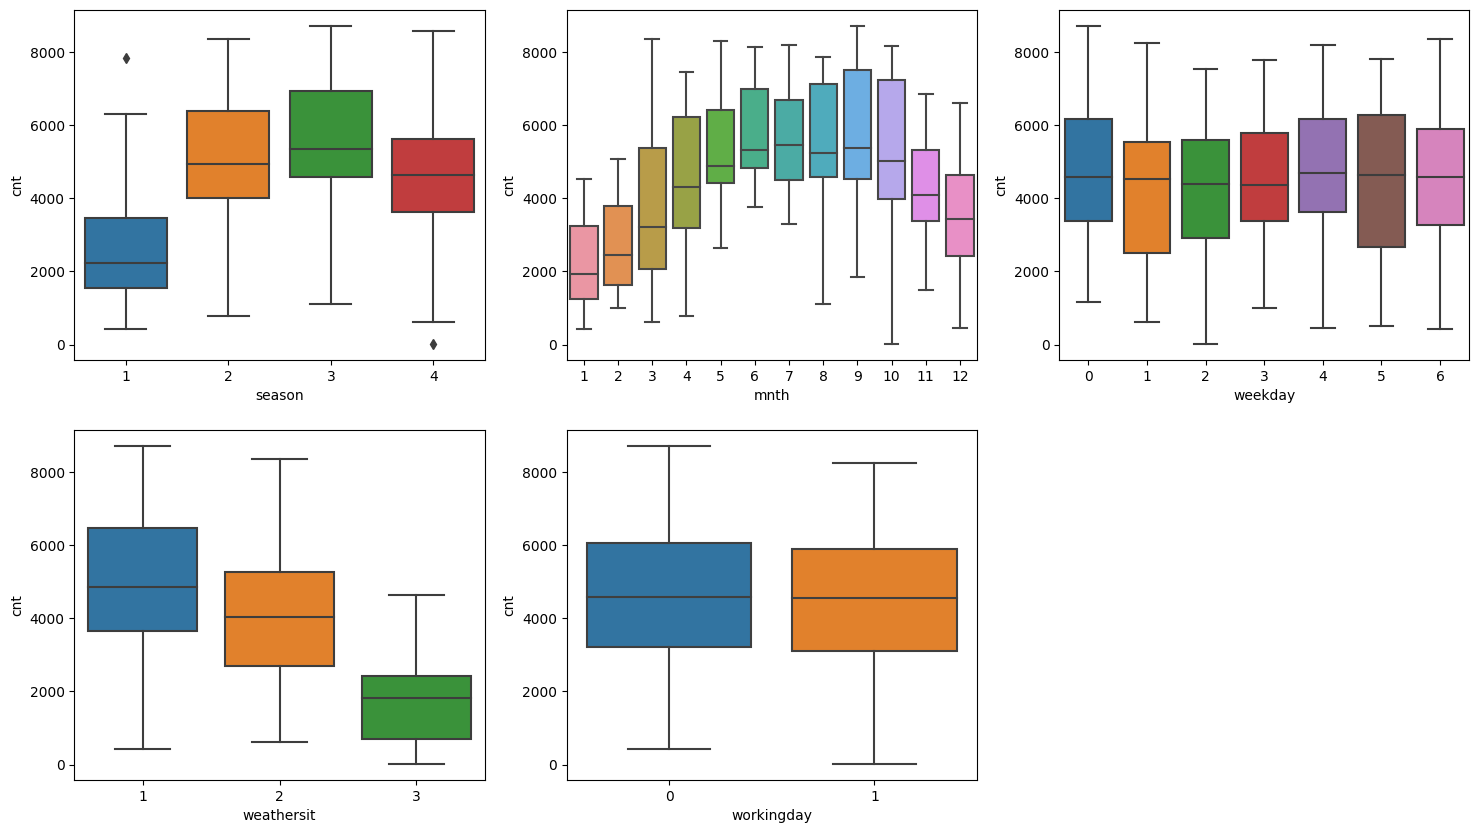

In [176]:
# Visualizing all catagorical columns

plt.figure(figsize = (18, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data=bike_share)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data=bike_share)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data=bike_share)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data=bike_share)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data=bike_share)

<Axes: >

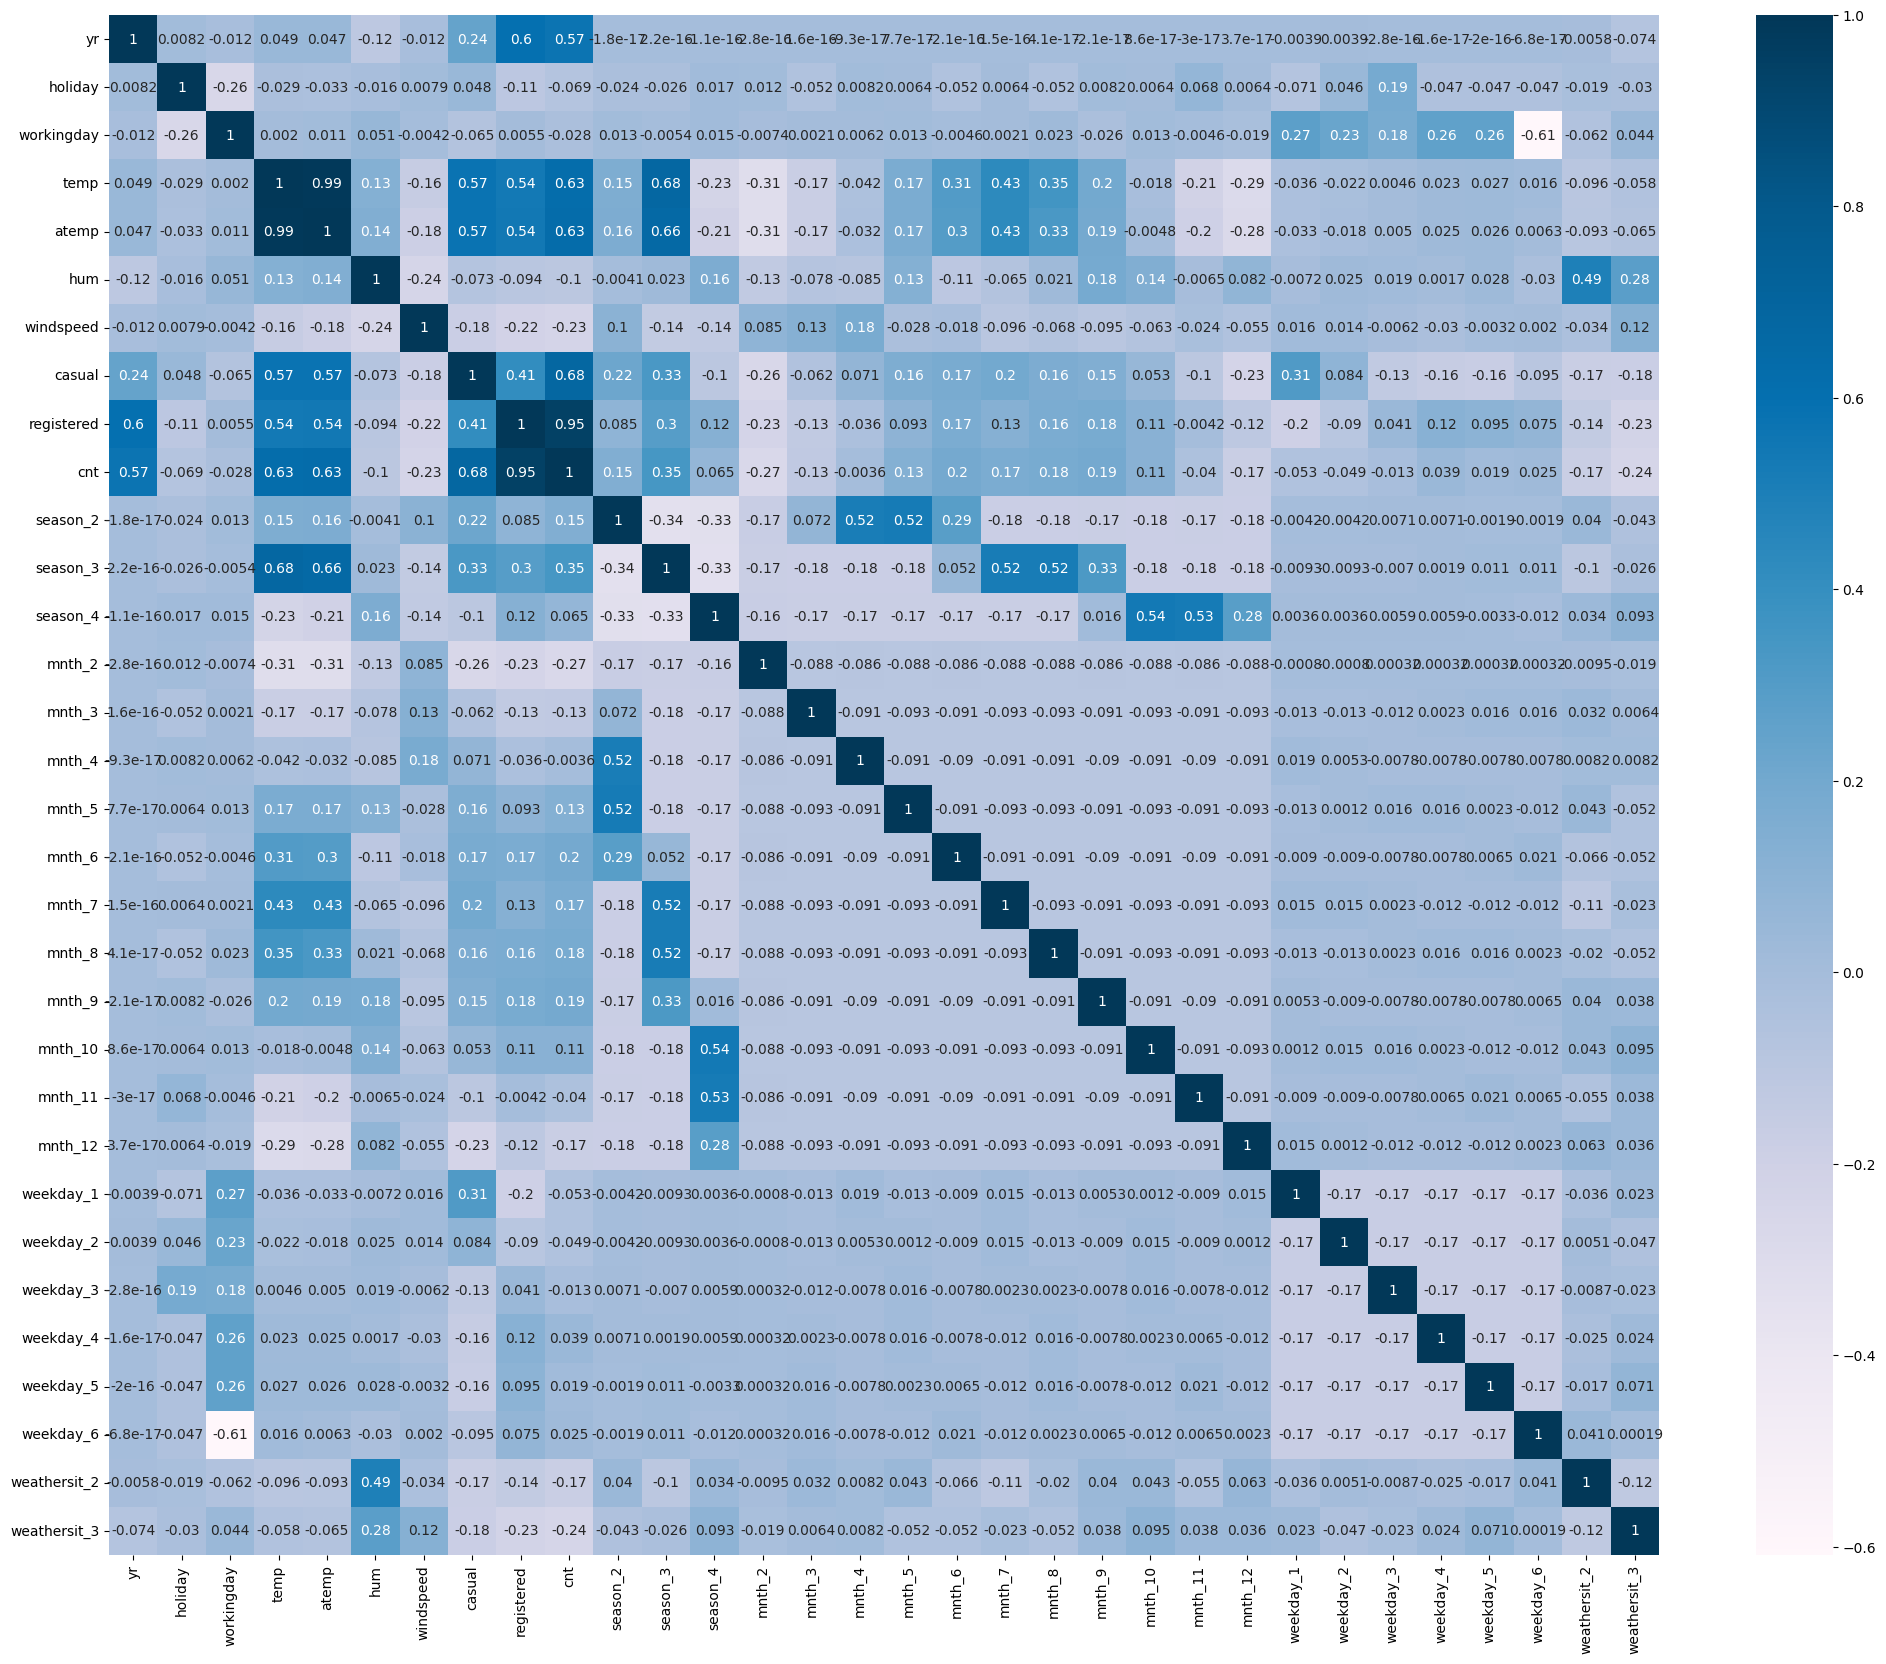

In [177]:
fig = plt.figure(figsize=(25, 20))
sns.heatmap(bike_share_updated.corr(), annot=True, cmap='PuBu')

In [178]:
# Feature re-scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [179]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,922.0,6612,7534,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,968.0,6248,7216,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,956.0,3110,4066,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,364.0,1432,1796,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,1120.0,3100,4220,...,0,0,0,0,0,0,0,0,1,0


In [180]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_2', 'season_3', 'season_4',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [181]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [182]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.461512,0.413569,0.406203,0.951776,0.864243,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.652079,0.363923,0.426514,0.899220,0.827658,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.543728,0.351077,0.421215,0.446145,0.465255,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.363506,0.911723,0.159832,0.203869,0.204096,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.371673,0.259139,0.493625,0.444701,0.482973,...,0,0,0,0,0,0,0,0,1,0


In [183]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.712329,0.537386,0.513133,0.557161,0.438843,0.360077,0.524618,0.514186,...,0.086106,0.084149,0.154599,0.152642,0.136986,0.142857,0.146771,0.129159,0.344423,0.029354
std,0.500412,0.157613,0.453121,0.225640,0.212202,0.182699,0.226661,0.274449,0.228459,0.224737,...,0.280795,0.277883,0.361876,0.359994,0.344170,0.350270,0.354224,0.335704,0.475645,0.168963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.415231,0.273856,0.136873,0.354100,0.356765,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.560607,0.409863,0.308626,0.525267,0.519673,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.688559,0.569822,0.473978,0.697372,0.688737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [184]:
# Building a linear model

X_train = df_train.drop('cnt', axis=1)
y_train = df_train['cnt']

In [185]:
X_train.head(1)

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,season_2,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.461512,0.413569,0.406203,0.951776,0,...,0,0,0,0,1,0,0,0,0,0


In [186]:
y_train.head(1)

653    0.864243
Name: cnt, dtype: float64

In [187]:
# Using RFE(Recursive Feature Elemination) for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [188]:
# Running RFE with required number of variables as 15
lm = LinearRegression()
lm_model_fit = lm.fit(X_train, y_train, )

rfe = RFE(lm_model_fit, n_features_to_select = 15)
rfe_fit = rfe.fit(X_train, y_train)

In [189]:
list(zip(X_train.columns, rfe_fit.support_, rfe_fit.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 3),
 ('windspeed', False, 2),
 ('casual', True, 1),
 ('registered', True, 1),
 ('season_2', False, 7),
 ('season_3', False, 8),
 ('season_4', False, 9),
 ('mnth_2', False, 13),
 ('mnth_3', False, 5),
 ('mnth_4', True, 1),
 ('mnth_5', False, 14),
 ('mnth_6', False, 11),
 ('mnth_7', True, 1),
 ('mnth_8', True, 1),
 ('mnth_9', False, 10),
 ('mnth_10', False, 16),
 ('mnth_11', False, 15),
 ('mnth_12', False, 12),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', True, 1),
 ('weathersit_2', False, 17),
 ('weathersit_3', False, 4)]

In [190]:
col = X_train.columns[rfe_fit.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'casual', 'registered', 'mnth_4',
       'mnth_7', 'mnth_8', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [191]:
X_train_rfe = X_train[col]

In [192]:
X_train_rfe.describe()

,yr,holiday,temp,atemp,casual,registered,mnth_4,mnth_7,mnth_8,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.537386,0.513133,0.360077,0.524618,0.078278,0.076321,0.095890,0.154599,0.152642,0.136986,0.142857,0.146771,0.129159
std,0.500412,0.157613,0.225640,0.212202,0.274449,0.228459,0.268872,0.265771,0.294729,0.361876,0.359994,0.344170,0.350270,0.354224,0.335704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.341151,0.332910,0.136873,0.354100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.542077,0.529300,0.308626,0.525267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.688457,0.473978,0.697372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [193]:
# Creating model using statsmodel

import statsmodels.api as sm
X_train_rfe_sm = sm.add_constant(X_train_rfe)
X_train_rfe_sm.head()

,const,yr,holiday,temp,atemp,casual,registered,mnth_4,mnth_7,mnth_8,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
653,1.0,1,0,0.509887,0.501133,0.406203,0.951776,0,0,0,0,0,1,0,0,0
576,1.0,1,0,0.815169,0.766351,0.426514,0.899220,0,1,0,0,0,1,0,0,0
426,1.0,1,0,0.442393,0.438975,0.421215,0.446145,0,0,0,0,0,0,0,0,0
728,1.0,1,0,0.245101,0.200348,0.159832,0.203869,0,0,0,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.391735,0.493625,0.444701,1,0,0,0,0,0,0,0,0


In [194]:
lr1 = sm.OLS(y_train, X_train_rfe_sm).fit()

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.757e+04
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        12:21:27   Log-Likelihood:                 1642.6
No. Observations:                 511   AIC:                            -3253.
Df Residuals:                     495   BIC:                            -3185.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.002      3.312      0.0

In [202]:
# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = X_train_rfe
vif['features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,temp,357.08
3,atemp,351.01
5,registered,22.23
4,casual,7.26
0,yr,4.29
12,weekday_4,2.15
13,weekday_5,2.02
11,weekday_3,1.96
14,weekday_6,1.80
10,weekday_2,1.66


In [195]:
col

Index(['yr', 'holiday', 'temp', 'atemp', 'casual', 'registered', 'mnth_4',
       'mnth_7', 'mnth_8', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [196]:
# Performing a predection as training R-squared value is 0.998 that meand 99% accuracy
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars]) # the scaler is already fit with training dataset
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.565508,0.115794,1.000000,0.427086,0.692706,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.505614,0.211364,0.384127,0.767976,0.712034,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.794188,0.459509,0.105083,0.346376,0.303382,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,0.881625,0.795343,0.286191,0.466884,0.389425,0.559630,0.547400,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.130470,0.738905,0.324080,0.608143,0.569029,...,0,0,0,0,0,0,0,1,0,0


In [197]:
# dividing the data set into X and y
X_test = df_test.drop('cnt', axis=1)
y_test = df_test['cnt']
print(X_test.shape)
print(y_test.shape)

(219, 31)
(219,)


In [198]:
X_test_new = X_test[col]

X_test_new_sm = sm.add_constant(X_test_new)

y_test_pred = lr1.predict(X_test_new_sm)

y_test_pred.head()

184    0.611832
535    0.714505
299    0.300330
221    0.544709
152    0.567335
dtype: float64

In [199]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [200]:
# Checking the r2-score
from sklearn.metrics import r2_score

In [201]:
r2_score(y_test, y_test_pred)

0.9959485221456906

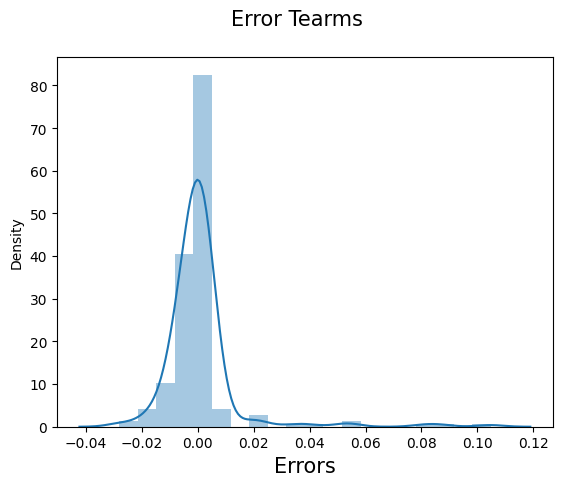

In [203]:
# Checking error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
plt.suptitle("Error Tearms", fontsize = 15)
plt.xlabel("Errors", fontsize = 15)
plt.show()